,Value
val_loss,0.648285
validation_binary_accuracy,0.658713
loss,0.539249
learning_rate,0.000010
binary_accuracy,0.745025
validation_loss,0.648285
val_binary_accuracy,0.658713
test_loss,0.661823
test_accuracy,0.602228


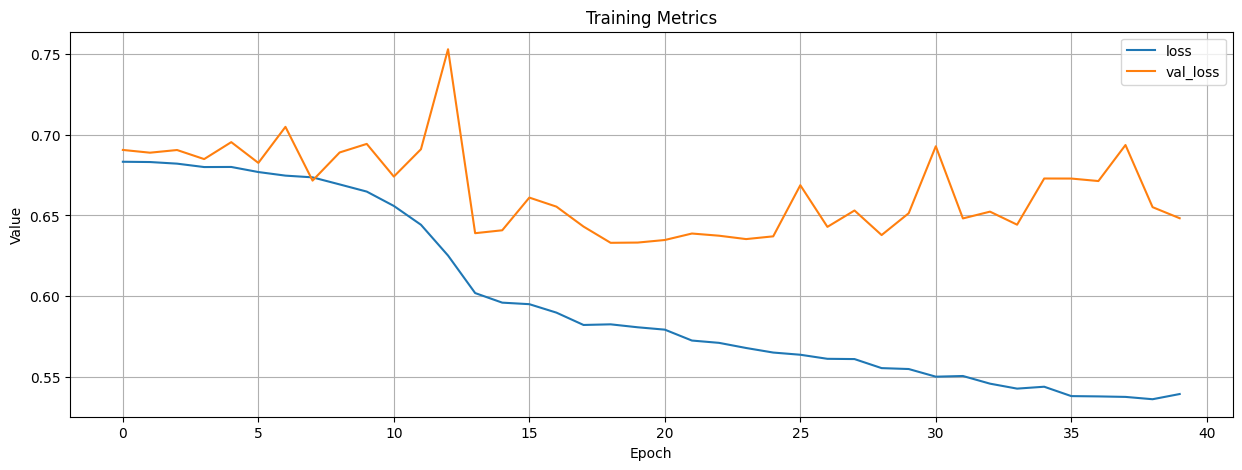

In [2]:
import mlflow
from metaflow import Flow
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Connect to MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Get specific flow and run
flow = Flow('ECGSimpleTrainingFlow')
selected_run = flow['1740392056525761']  # Replace with your run ID

# Get the MLflow run ID
mlflow_run_id = selected_run.data.mlflow_run_id
run = mlflow.get_run(mlflow_run_id)

# Display final metrics
metrics = run.data.metrics
metrics_df = pd.DataFrame([metrics]).T
metrics_df.columns = ['Value']
display(metrics_df)

# Get training history
training_history = selected_run.data.train_history
history_df = pd.DataFrame(training_history)

# Plot configuration
metrics_to_plot = ['loss', 'val_loss']  # Replace with your chosen metrics
plt.figure(figsize=(15, 5))

# Create plot
for metric in metrics_to_plot:
    plt.plot(history_df[metric], label=metric)

plt.title('Training Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()